In [297]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Задаем матрицу переходных вероятностей - A и матрицу эмиссий - E:

In [298]:
v1 = float(1/6)
v2 = 0.1
A = np.array([[0.95, 0.05], [0.1, 0.9]], float)
E = np.array([[v1, v1, v1, v1, v1, v1], [v2, v2, v2, v2, v2, 0.5]], float)

Затем задаем длину последовательности - L и вектор стационарного распределения - s:

In [299]:
L = 300
s = np.array([2/3, 1/3])

При заданных A и E получим вектора действительных состояний - state и наблюдений - observation.
Сначала получим число от 0 до 1 и зададим нулевое состояние - satet[0], после чего найдем первое наблюдение, а затем вектор состояний и вектор наблюдений для заданной длины последовательности - L:

In [300]:
observation = np.zeros((L,),dtype=int)
state = np.zeros((L,),dtype=int)

D = np.random.random() #кость
N = np.random.random() #число

if 0 <= N < 2/3:
    state[0] = 0
else:
    state[0] = 1
    
k = 0
for i in range(6):
    k += E[state[0], i]
    if N < k:
        observation[0] = i + 1 
        break;
        
for j in range(1, L):
    D = np.random.random()
    N = np.random.random()
    k1 = 0
    k2 = 0
    for i in range(2):
        k1 += A[state[j - 1], i]
        if D < k1:
            state[j] = i
            break;
    for i in range(6):
        k2 += E[state[j], i]
        if N < k2:
            observation[j] = i + 1
            break;
            
print("Вектор наблюдений:\n", observation)
print("\nВектор состояний:\n", state)

Вектор наблюдений:
 [3 1 4 4 2 5 3 5 2 2 5 3 3 1 5 6 1 6 6 5 1 4 6 6 6 3 6 5 3 1 6 5 1 6 3 2 3
 6 6 6 4 6 6 2 5 6 6 6 6 3 6 1 3 4 6 4 4 5 2 3 6 1 3 5 6 3 2 3 4 1 1 5 5 6
 2 1 1 5 4 5 5 2 1 6 1 4 2 3 3 5 5 3 1 6 6 6 6 2 5 2 5 2 3 5 5 5 2 2 4 6 2
 6 6 1 6 3 6 6 2 6 6 6 6 6 6 1 6 4 6 6 6 6 2 2 6 2 6 4 5 6 2 4 1 2 3 5 3 5
 3 4 6 6 2 2 6 6 5 5 4 6 6 4 4 6 2 2 6 5 4 2 5 5 5 6 3 6 2 6 4 5 5 2 1 3 5
 6 3 1 6 5 3 6 6 6 2 6 1 3 6 5 6 1 1 6 2 6 1 6 6 6 1 6 2 3 2 3 5 5 4 4 2 5
 5 2 6 2 4 4 2 1 2 1 3 4 6 3 5 5 2 2 4 3 1 4 6 1 2 2 1 3 2 6 4 5 4 3 1 6 4
 6 1 2 5 2 1 2 2 3 2 5 1 6 6 3 6 4 3 6 1 1 6 6 1 6 6 1 6 6 6 6 6 4 6 1 5 6
 6 6 2 3]

Вектор состояний:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

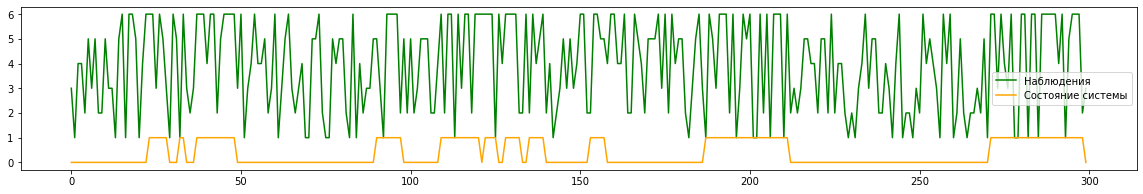

In [301]:
fig, ax = plt.subplots()
a1 = np.arange(L)
b1 = observation
a2 = np.arange(L)
b2 = state
ax.plot(a1, b1, color = "Green", label = "Наблюдения")
ax.plot(a2, b2, color = "Orange", label = "Состояние системы")
ax.legend()
fig.set_size_inches(20, 3)
plt.show()

#### Алгоритм Витерби

In [302]:
V = np.zeros((2,L))
P = np.zeros((2,L), dtype = int)
most_probable_cond = np.zeros((L,), dtype = int)

V[:,0] = s * E[:,observation[0] - 1]

for i in range(1, L):
    for j in range(2):
        V[j,i] = np.max(V[:,i - 1] * A[:,j] * E[:,observation[i] - 1])
        P[j,i] = np.argmax(V[:,i - 1] * A[:,j] * E[:,observation[i] - 1])
    V[:,i] /= np.max(V[:,i])
most_probable_cond[-1] = np.argmax(V[:,-1])

for i in range(L-2, -1, -1):
    most_probable_cond[i] = P[most_probable_cond[i + 1],i + 1]
print("Массив наиболее вероятных состояний:\n", most_probable_cond)

overlap = 0
for i in range(L):
    if state[i] == most_probable_cond[i]:
        overlap = overlap + 1
print("\nКоличество бросков = L =", L, "\nКоличество совпадений =", overlap)

Массив наиболее вероятных состояний:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]

Количество бросков = L = 300 
Количество совпадений = 255


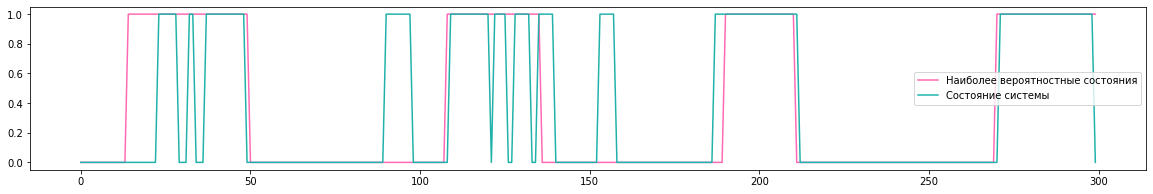

In [303]:
fig, ax = plt.subplots()
a1 = np.arange(L)
b1 = most_probable_cond
a2 = np.arange(L)
b2 = state
ax.plot(a1, b1, color = "Hotpink", label = "Наиболее вероятностные состояния")
ax.plot(a2, b2, color = "Lightseagreen", label = "Состояние системы")
ax.legend()
fig.set_size_inches(20, 3)
plt.show()

#### Алгоритм просмотра вперед

In [304]:
finish_matrix = np.zeros((2,L)) #итоговая матрица
norm_coef_matrix = np.zeros((L)) #вектор нормировочных коэфициентов
finish_matrix[:,0] = s * E[:,observation[0] - 1] #нулевой столбец
norm_coef_matrix[0] = max(finish_matrix[:,0])
finish_matrix[:,0] /= norm_coef_matrix[0]
    
for i in range(1, L):
    for j in range(2):
        finish_matrix[j,i] = E[j,observation[i] - 1] * sum(finish_matrix[:,i - 1] * A[:,j])
    norm_coef_matrix[i] = max(finish_matrix[:,i])
    finish_matrix[:,i] /= norm_coef_matrix[i]
norm_observation_pr = sum(finish_matrix[:,-1]) 

print("Нормированная вероятность наблюдения:\n", norm_observation_pr)

Нормированная вероятность наблюдения:
 1.7724079869385347


#### Алгоритм просмотра назад

In [305]:
finish_matrix_back = np.zeros((2,L)) #итоговая матрица
norm_coef_matrix_back = np.zeros(L) #вектор нормировочных коэфициентов
finish_matrix_back[:,-1] = np.array([1,1])
norm_coef_matrix_back[-1] = 1

for i in range(L-2, -1, -1):
    for j in range(2):
        finish_matrix_back[j,i] = sum(finish_matrix_back[:,i + 1] * A[j] * E[:,observation[i + 1] - 1])
    norm_coef_matrix_back[i] = max(finish_matrix_back[:,i])
    finish_matrix_back[:,i] /= norm_coef_matrix_back[i]
norm_observation_pr_back = sum(finish_matrix_back[:,0] * s * E[:,observation[0] - 1])

print("Нормированная вероятность наблюдения:\n", norm_observation_pr_back)

Нормированная вероятность наблюдения:
 0.11913687120169666


В данном алгоритме воспользуемся логарифмической функцией, для того, чтобы избежать потери точности. 

In [306]:
value_1 = np.log(norm_observation_pr)
value_2 = sum(np.log(norm_coef_matrix))
value_3 = np.log(norm_observation_pr_back)
value_4 = sum(np.log(norm_coef_matrix_back))
#print(value_1)
#print(value_3)
#print(value_2)
#print(value_4)
print("Вероятность Алгоритма просмотра вперед =", value_1 + value_2)
print("Вероятность Алгоритма просмотра назад =", value_3 + value_4)

Вероятность Алгоритма просмотра вперед = -507.977831582594
Вероятность Алгоритма просмотра назад = -507.9778315825939


#### Апостериорное декодирование

In [307]:
decoding = np.zeros(L)

for i in range(L):
    decoding[i] = np.log(finish_matrix[0][i]) + sum(np.log(norm_coef_matrix[:i+1])) + np.log(finish_matrix_back[0][i]) + \
                sum(np.log(norm_coef_matrix_back[i:])) - np.log(norm_observation_pr) - sum(np.log(norm_coef_matrix))

aposterior_decoding = 1 - (np.exp(decoding))
print(aposterior_decoding)

[0.06736588 0.04519976 0.03293497 0.02624034 0.02275175 0.02123726
 0.02116204 0.02249952 0.02572202 0.03196753 0.04344156 0.06419602
 0.10156009 0.16872841 0.28942062 0.50625764 0.56617448 0.69561854
 0.72209371 0.67801908 0.68081901 0.73148227 0.84789995 0.87937772
 0.86446042 0.78488169 0.75848066 0.63722324 0.58334498 0.57781947
 0.61869545 0.5807041  0.5888368  0.6459655  0.62435499 0.64832443
 0.72633831 0.88594625 0.93936523 0.95200733 0.93935292 0.95812305
 0.95333911 0.91914313 0.92046491 0.95777122 0.96568632 0.9539023
 0.90798952 0.77172733 0.70812261 0.49722389 0.38538378 0.33310735
 0.32193386 0.20763985 0.14651596 0.11697708 0.10859192 0.11839937
 0.1498628  0.11303064 0.09837082 0.1007064  0.12086218 0.07603954
 0.0514095  0.03827427 0.03199531 0.03035528 0.03277504 0.04010909
 0.05494735 0.08252976 0.05403055 0.03836366 0.02999655 0.02597447
 0.02487707 0.02631684 0.03080219 0.03991707 0.05688029 0.08768219
 0.06119284 0.0481274  0.04387198 0.04692383 0.05836067 0.08222

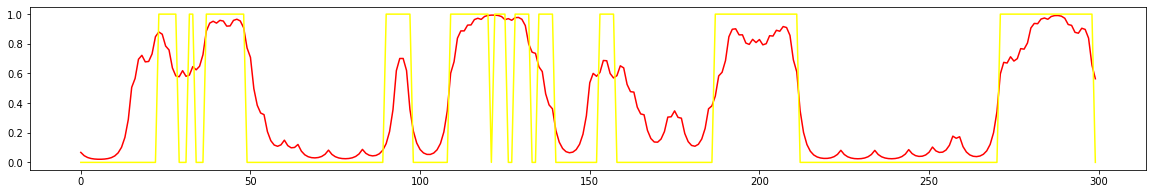

In [308]:
fig, ax = plt.subplots()
c1 = np.arange(L)
d1 = aposterior_decoding
c2 = np.arange(L)
d2 = state
ax.plot(c1, d1, color = "Red")
ax.plot(c2, d2, color = "Yellow")
fig.set_size_inches(20, 3)
plt.bar
plt.show()